# Abstract

The Binomial and Poission probability distribution functions (PDF) were explored. The binomial probability of simulated coin flips with equal probabilties for "success" (heads) and "failure" (tails) was compared to the analytical binomial PDF. The experimental binomial PDF in a situation where the probability of success very small was then compared to the analytical binomial and Poission PDF. As the number of trials over which a probability is calculated increases, so does the accuracy of the the calculated probability. Also, the Poisson PDF is a close approximate of the binomial PDF for small probabilities of success.

# Introduction

This lab utilizes frequentist probability, which involves repeating an event over a large number of trials, and averaging the probabilities of the success of the event in each trial. This allows for the creation of a probability distribution function, which calculates the probability of a certain amount of successes occurring in an event. Probability distribution functions, such as the Binomial or Poisson PDFs, are extremely useful in predicting the outcome of an event.

In astronomy and astrophysics, statistical concepts such as these can be used to analyze astronomical data. This lab will provide an opportunity to delve into the mathematics behind probability distribution functions, and how to utilize them when programming to analyze data.

# Theory

The Binomial probability distribution function describes situations in which there are only two outcomes with discrete probabilities, such as a coin flip. It provides the probability of a success occuring x times out of sample size N. In the case of this lab, coin flips are being simulated, so N is the number of coin flips is a trial, and x is the number of heads (successes) that were flipped in that trial. This can be summed over a number of trials, denoted later as M. 

$$P(N,x) = \frac{N!}{x!(N-x)!}\ p^{x}\ (1-p)^{N-x} $$

The Poisson probability distribution function describes situations in which the probability of success p is very small. It can be used to approximate the binomial probability distribution function when p is small. In the binomial PDF, when p is small, N approaches infinity. The limit of the binomial PDF can be taken to reach the Poisson approximation.

$$\lambda = N*p $$ 

$$\lim_{N\to\infty} \frac{N!}{x!(N-x)!}\ p^{x}\ (1-p)^{N-x}$$

$$ = \lim_{N\to\infty} \frac{N!}{x!(N-x)!}\ \frac{\lambda}{N})^{x}\ (1-\frac{\lambda}{N})^{N-x}$$

$$ = \lim_{N\to\infty} \frac{\lambda^{x}}{x!}  [\frac{N!}{(N-x)!}] [\frac{1}{N^{x}}] [ (1 - \frac{\lambda}{N} )^{N}  (1 - \frac{\lambda}{N} )^{-x}  ]$$

$$\lim_{N\to\infty} \frac{\lambda^{x}}{x!} = \frac{\lambda^{x}}{x!}$$

Then, 

$$\lim_{N\to\infty} \frac{N!}{(N-x)!}\ \frac{1}{N^{x}} $$

$$ = \lim_{N\to\infty} \frac{N \ (N-1) \ (N-2)... (N-x)!}{(N-x)!\  N^{x}} = \frac{N \ (N-1) \ (N-2)...(N-x+1)}{N^{x}} $$

$$ = \lim_{N\to\infty} \frac{N}{N} \frac{N-1}{N} \frac{N-2}{N} \ ...\ \frac{N-x+1}{N} \approx 1$$

$$\lim_{N\to\infty}  (1 - \frac{\lambda}{N} )^{-x} = 1$$

$$\lim_{N\to\infty}  (1 - \frac{\lambda}{N} ) $$
$$ = e^{\lim_{N\to\infty} ln(1 - \frac{\lambda}{N})^{N}} $$
$$ = e^{\lim_{N\to\infty} N\ ln(1 - \frac{\lambda}{N})}$$ 
$$ = e^{\lim_{N\to\infty} \frac{ln(1 - \frac{\lambda}{N})}{1/N}}$$

Here, we can use L'Hopital's rule to reach the below:

$$ = e^{\lim_{N\to\infty} \frac{\frac{-\lambda}{\lambda N - N^2}}{\frac{-1}{N^2}}}$$
$$= e^{\lim_{N\to\infty} \frac{\frac{-1}{N^2}\frac{\lambda}{\lambda/N - 1}}{\frac{-1}{N^2}}}  $$
$$ = e^{\lim_{N\to\infty} \frac{\lambda}{\lambda/N - 1}}$$

$$ e^{\frac{\lambda}{-1}} = e^{-\lambda} $$

Merge the above to reach:

$$\lim_{N\to\infty} P(N,x) = \frac{\lambda^x}{x!} \ e^{-\lambda}$$

This is the equation for the Poisson PDF! Thus, at small p, the binomial PDF can be approximated by the Poisson PDF. 

Expectation value and variance are also explored here. The expectation value is an average that is probability-weighted over all of the values in a distribution. This can be expressed as:

$$ E(x) = \sum_{i=1}^{N} x_i\ P_i (x)$$

Variance is a measure of the spread between values in a distribution. It can be expressed as:

$$ Var (x) = <x^2> - <x>^2 $$ 

This is the expectation value of the mean squared, minus the expectation value of the mean, quantity squared.

# Experiment and Methodology

Here are the importations of the numpy library for various mathematical and array functions, matplotlib for plotting, and scipy for accurate factorials.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

## Part 1

The function below simulates a coin flip scenario in which the probability of heads (success) and tails (failure) are equal. A coin is flipped N number of times in a trial, over M total trials. These values N and M are the inputs of the function. The coin flip is simulated by N random numbers being generated, either 0 or 1, with 1 being heads. The total number of heads in each trial is summed. In an array from 0 to N, one count is then placed in the index corresponding to the sum of heads in that trial. This is repeated M number of times. These heads sum counts are converted to probability by dividing the final, summed array by M. The result is the experimental binomial probability function for the input number of coins and trials.

The wanted number of heads out of coins flipped per trial is defined as x, and a print function will output the value at the relevant index in the final probability array. 

In [19]:
N = 10     #number of coins flipped per trial
M = 10000     #number of trials
x = 5     #number of successes wanted

#output experimental binomial pdf
def P(N,M):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.randint(2,size=N)
        heads_count = len(draw[(np.where(draw == 1))])
        counts[heads_count] = counts[heads_count] + 1
    prob = counts / M
    return prob
    
print("Probability of",x,"heads out of",N,"coin flips over",M,
      "trials:",P(N,M)[x])

Probability of 5 heads out of 10 coin flips over 10000 trials: 0.2457


This code plots the experimental probability at a specific value x measured based on the number of trials. It calls the previous function with varying values of M, from 1 to 10000, in this case. An array is filled with the experimental probability at value x for each of these number of trials, and this is plotted against the number of trials. 

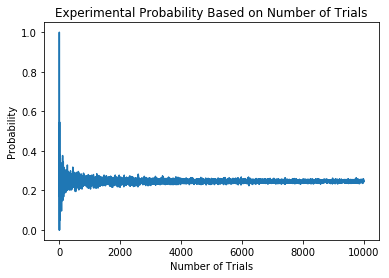

This plot compares the experimental probability of x number of heads out of N coin flips over M number of trials to the number of trials M. As M increases, the experimental probability converges.
Probability at 10000 number of trials: 0.245324532453


In [18]:
N = 10     #coins flipped per trial
M = 10000    #trials
x = 5   #wanted sum of heads in a trial

prob = np.zeros(M)

for i in range(1,M):
    prob[i] = P(N,i)[x]
    
plt.plot(np.arange(M),prob)
plt.title("Experimental Probability Based on Number of Trials")
plt.xlabel("Number of Trials")
plt.ylabel("Probability")
plt.show()

print("This plot compares the experimental probability of x number of heads out of N coin flips over M number of trials to the number of trials M. As M increases, the experimental probability converges.")
print("Probability at",M,"number of trials:",prob[M-1])

This section of code plots a histogram of the experimental probability distribution function for number of coin flips per trial N = 20. 

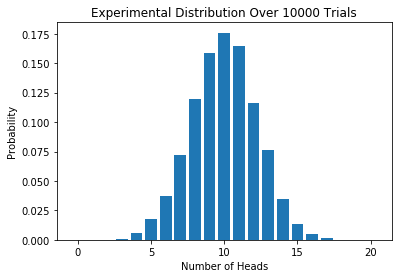

This histogram plots the frequencies of the sum of heads flipped in a trial out of 20 coins flipped over 10000 trials. The frequency is represented as probabilities.


In [21]:
N = 20    #coins flipped per trial
M = 10000  #trials
    
title = 'Experimental Distribution Over ' + str(M) + ' Trials'
plt.bar(np.arange(N+1),P(N,M))
plt.title(title)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.show()

print("This histogram plots the frequencies of the sum of heads flipped in a trial out of 20 coins flipped over 10000 trials. The frequency is represented as probabilities.")

The Binomial function below serves to generate the analytical binomial PDF. Input are the number of coins flipped per trial N and the probability of heads in each flip p. The binomial is defined as described in the theory section, using the input N and p, and generating an array for the sum of heads in a trial x from 0 to N. This creates an array of the values of the analytical binomial PDF at each index in the array.

Then, the analytical binomial PDF for N=20, p=0.5 is plotted over the histogram of the experimental binomial PDF for N=20.

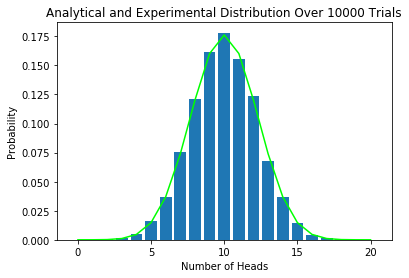

This plot compares the experimental binomial PDF at N=20 and M=10000 to the analytical binomial PDF at the same value of N. The analytical function matches the experimental values quite well.


In [23]:
N = 20  #coins flipped per trial
M = 10000   #trials
p = 0.5   #probability of heads in each flip

#output is the analytical binomial PDF
def Binomial(N,p):
    x = np.arange(N+1)
    binomial = (sps.factorial(N)*p**x*(1-p)**(N-x))/(sps.factorial(x)*sps.factorial(N-x))
    return binomial

plt.bar(np.arange(N+1),P(N,M))
plt.plot(np.arange(N+1),Binomial(N,p),color="lime")
title = 'Analytical and Experimental Distribution Over ' + str(M) + ' Trials'
plt.title(title)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.show()

print("This plot compares the experimental binomial PDF at N=20 and M=10000 to the analytical binomial PDF at the same value of N. The analytical function matches the experimental values quite well.")

The first function in this code block, the Expectation function, calculates the experimental expectation value for the sum number of heads per trial. The inputs are the number of coins flipped per trial N, and the number of trials M. An array x is created with values 0 to N, which is plugged into the formula for expectation value, along with the probability array output by the experimental binomial pdf function, called at the same N and M.

The second function, the Mean function, outputs the analytical mean -- corresponding to the analytical expectation value -- for the input number of trials N and probability p. 

Printed below are the experimental and analytical expectation values for N=20 and N=40.

In [25]:
M = 10000 #trials
p = 0.5 #probability of heads

def Expectation(N,M):
    x = np.arange(N+1)
    expectation = sum(x * P(N,M))
    return expectation

def Mean(N,p):
    u = N * p
    return u

print("Expectation value for N=20:",Expectation(20,1000))
print("Analytical mean for N=20:",Mean(20,0.5))
print()
print("Expectation value for N=40:",Expectation(40,1000))
print("Analytical mean for N=40:",Mean(40,0.5))
print()
print("The experimental expectation values and analytical means are quite close.")

Expectation value for N=20: 10.034
Analytical mean for N=20: 10.0

Expectation value for N=40: 20.072
Analytical mean for N=40: 20.0

The experimental expectation values and analytical means are quite close.


## Part 2

In the code below, two functions are defined. The function Pvariable is a variation of the experimental binomial PDF function, this time allowing for a variable probability of success p. The alteration in the code is that the number 0 or 1 is now chosen with respective probabilities of 1-p and p. It takes as input the number of coin flips per trial N, number of trials M, and probability of heads p. The function outputs the experimental binomial pdf. 

The function Poisson generates the analytical Poisson pdf. Input are the number of coin flips per trial N and the probability of heads p. These variables, along with the sum number of heads x from 0 to N, are used in the poission pdf equation described in the theory section. Output is the analytical Poisson probability at the different values of x. 

The experimental binomial pdf for small p, in this case p=0.05, is plotted as a histogram. Plotted over this are the analytical probability distribution functions predicted by the Binomial and Poisson equations. Printed below the plot are the peak values for each PDF.

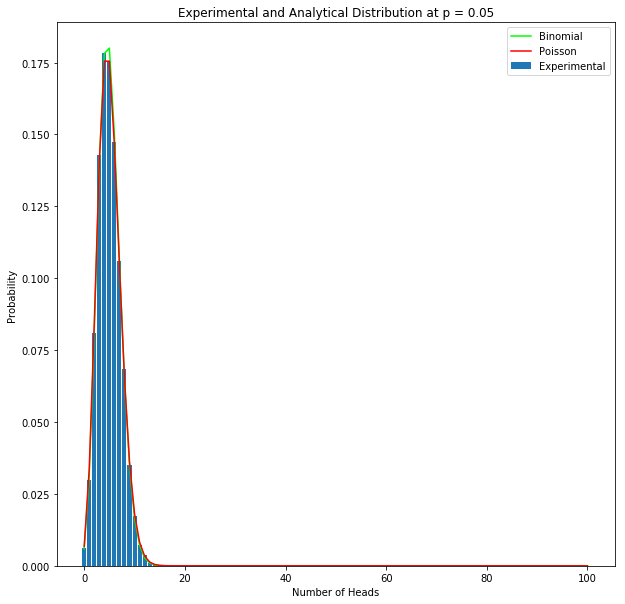

This plot compares the experimental binomial PDF for p=0.05 to the analytical PDFs expected for the Binomial and Poisson distributions. Both analytical curves follow the experimental distribution closely with little variation from each other.

The experimental Binomial peak is at 0.1782
The analytical Binomial peak is at 0.18001782727
The analytical Poisson peak is at 0.175467369768


In [61]:
N = 100  #coin flips per trial
M = 10000  #trials
p = 0.05

def Pvariable(N,M,p):
    counts = np.zeros(N+1)
    for i in range(0,M):
        draw = np.random.choice((0,1),p=[1-p,p],size=N)
        heads_count = len(draw[(np.where(draw == 1))])
        counts[heads_count] = counts[heads_count] + 1
    prob = counts / M
    return prob

def Poisson(N,p):
    x = np.arange(N+1)
    poisson = (N*p)**x*np.exp(-(N*p))/sps.factorial(x)
    return poisson

pvariableplot = Pvariable(N,M,p)

title = 'Experimental and Analytical Distribution at p = ' + str(p)
plt.figure(figsize=(10,10))
plt.bar(np.arange(N+1),pvariableplot,label="Experimental")
plt.plot(np.arange(N+1),Binomial(N,p),color="lime",label="Binomial")
plt.plot(np.arange(N+1),Poisson(N,p),color="red",label="Poisson")
plt.title(title)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.legend()
plt.show()

print("This plot compares the experimental binomial PDF for p=0.05 to the analytical PDFs expected for the Binomial and Poisson distributions. Both analytical curves follow the experimental distribution closely with little variation from each other.")
print()
print("The experimental Binomial peak is at",max(pvariableplot))
print("The analytical Binomial peak is at",max(Binomial(N,p)))
print("The analytical Poisson peak is at",max(Poisson(N,p)))


The code block below defines two functions. The first function, Expectation2, is a variant of the expectation functino, this time with added input of probability of success p, and utilizing the Pvariable function to calculate the expectation value. The Variance function calculates the experimental variance seen in the Pvariable experimental binomial PDF. This is calculated using the input variables N, M, and p, plugging them into the equation for variance, described in the theory section. In practice, it calls the Expectation2 function with the input N, and with the input N^2.

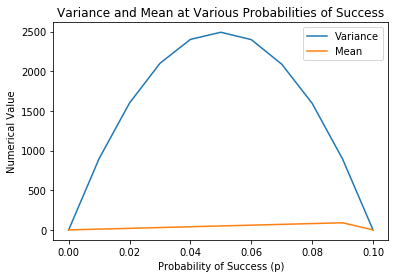

This plot compares the experimental variance and analytical mean at values of p sufficient for the Poisson approximation.


In [76]:
N = 100
M = 10000
pdiv = 10

def Expectation2(N,M,p):
    x = np.arange(N+1)
    expectation = sum(x * Pvariable(N,M,p))
    return expectation

def Variance(N,M,p):
    variance = (Expectation2(N**2,M,p) - Expectation2(N,M,p)**2)
    return variance

var = np.zeros(pdiv+1)
mean = np.zeros(pdiv+1)

for i in range(0,pdiv):
    var[i] = Variance(N,M,i/pdiv)
    mean[i] = Mean(N,i/pdiv)
    
plt.plot(np.arange(pdiv+1)/(pdiv*10),var, label='Variance')
plt.plot(np.arange(pdiv+1)/(pdiv*10),mean,label='Mean')
plt.title("Variance and Mean at Various Probabilities of Success")
plt.xlabel("Probability of Success (p)")
plt.ylabel("Numerical Value")
plt.legend()
plt.show()

print("This plot compares the experimental variance and analytical mean at values of p sufficient for the Poisson approximation.")

# Summary

The Binomial and Poisson probability distribution functions were explored. In Part 1, The experimental PDF of a simulated coin flip with equal odds was generated. The probability for a certain number of successes in a trial was observed in relation to the number of trials. As the number of trials increased, the probability converged toward a single value. The experimental PDF created was compared to the analytical binomial PDF, and the two were found to be very similar. The expectation values were calculated at various numbers of coin flips per trial, and were found to be very close to the analytical mean of the distributions. 

In Part 2, the experimental PDF was was generated for a simulated coin flip with the probability of getting heads being small, the value used being p=0.05. The experimental PDF with low p was plotted as a histogram with the analytical binomial PDF and Poisson PDF. Both the analytical binomial and Poisson PDFs were a good fit for the data, with very little variation between the two. The experimental variance of the simulated low-p PDF was plotted, along with the analytical mean, for p values below p=0.1. The experimental variance follows a normal distribution.

# Conclusion

It was shown that as the number of trials M over which the experimental PDFs are averaged increases, the experimental probabilities begin to converge toward the analytical value of the binomial PDF. At a value of M=10000, the probability converged to the analytical value within about 2% error. Thus, for experimental PDFs to provide an accurate approximation of the analytical PDF, M must be very large, on the order of 10^4 or larger. 

The accuracy of the experimental PDF averaged over large M was once again proven by the plot overlaid with the analytical binomial PDF -- the histogram and analytical line match almost perfectly. In addition to this, the expectation values calculated from the experimental PDF very nearly matched the analytical means expected of the distributions. Thus, in situations such as a coin flip with even odds (simulated or real), the experimental PDF will converge to the binomial PDF when averaged over a large number of trials M. 

In the case of uneven odds, when the probability of success p is small, the experimental distribution was proven to converge to both the Binomial PDF, and the Poisson PDF approximation. As derived in the theory section and proven by the plot at small p, the Poisson PDF does in fact provide an accurate approximation of a Binomial PDF at small p. The experimental variance at values of p small enough to be approximated by the Poisson PDF followed a normal, Gaussian distribution, as expected. 